# Kaggle Playground - January Challenge

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, r2_score
from statsmodels.api import OLS, add_constant
from xgboost import XGBRegressor

## EXPLORATORY ANALYSIS

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [3]:
test = pd.read_csv('data/test.csv')
test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [4]:
print(len(train), len(test))

300000 200000


In [5]:
train.isnull().sum()
test.isnull().sum()

id        0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
dtype: int64

In [6]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


<AxesSubplot:>

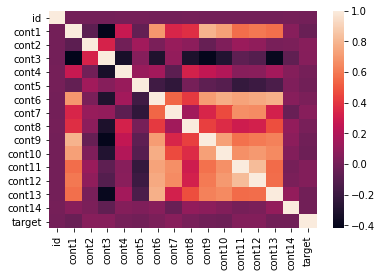

In [27]:
sns.heatmap(train.corr())

## MODELS

In [4]:
X = train.drop(['id', 'target'], axis=1)
y = train['target']

print(X.shape, y.shape)

(300000, 14) (300000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [6]:
def apply_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    model_predictions = model.predict(X_test)
    return model_predictions

def calculate_mse(X, y):
    mse = round(mean_squared_error(X, y),3)
    rmse = round(np.sqrt(mean_squared_error(X, y)),3)
    print("MSE:", mse, "RMSE:", rmse)

## Linear Regression

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
calculate_mse(y_test, lr_pred)

MSE: 0.523 RMSE: 0.724


## Random Forest

In [42]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
ypred_rfr = rfr.predict(X_test)

In [44]:
rfr_rmse = round(mean_squared_log_error(y_test, ypred_rfr),4)
rfr_rmsle = round(np.sqrt(mean_squared_log_error(y_test, ypred_rfr)), 4)
print(
    'RFR RMSE:', rfr_rmse,
    'RFR RMSLE:', rfr_rmsle)

RFR RMSE: 0.006 RFR RMSLE: 0.08


In [45]:
# cross_validate(rfr, X_train, y_train,return_train_score=True)

## Random Forest with feature selection

In [60]:
# Feature selection
rfe = RFE(rfr)
rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False False  True False False False False  True
  True False]
[1 1 1 1 8 4 1 3 7 2 5 1 1 6]


In [10]:
X_rfr = train.drop(['id','target','cont5','cont9','cont11','cont14'], axis=1)
X_train_rfr, X_test_rfr, y_train, y_test = train_test_split(X_rfr, y, test_size=.2, random_state=42)

In [11]:
rfr_new = RandomForestRegressor()
rfr_new.fit(X_train_rfr, y_train)
ypred_rfr_new = rfr_new.predict(X_test_rfr)

In [12]:
calculate_mse(y_test, ypred_rfr_new)

MSE: 0.504 RMSE: 0.71


In [13]:
np.sqrt(mean_squared_error(y_test, ypred_rfr_new))

0.7100003102102258

In [18]:
test_id = test['id']
test_noid_short = test.drop(['id','cont5','cont9','cont11','cont14'], axis=1)
rfr_new_test_pred = rfr_new.predict(test_noid_short)

In [19]:
predictions = pd.DataFrame()
predictions['id'] = test_id
predictions['target'] = rfr_new_test_pred
predictions = predictions[['id','target']]

predictions.to_csv('predictions/rfr_new_predictions.csv', index=False)

## Gradient Boosting Regressor

In [20]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

In [21]:
calculate_mse(y_test, gbr_pred)

MSE: 0.494 RMSE: 0.703


In [22]:
test_id = test['id']
test_noid = test.drop(['id'], axis=1)
gbr_test_pred = gbr.predict(test_noid)

In [23]:
predictions = pd.DataFrame()
predictions['id'] = test_id
predictions['target'] = gbr_test_pred
predictions = predictions[['id','target']]

predictions.to_csv('predictions/gbr_predictions.csv', index=False)

## XGBoost with GridSearch

In [7]:
parameters = {'n_estimators': [1500, 2000, 2500],
          'learning_rate': [0.01, 0.02]
        }

xgb = XGBRegressor(
        objective = 'reg:squarederror',
        learning_rate = 0.01,
        tree_method = 'gpu_hist')


gridsearch = GridSearchCV(xgb, 
                           param_grid = parameters, 
                           scoring='neg_root_mean_squared_error',
                           verbose = 10)

gridsearch.fit(X_train, y_train)


print('\n Best estimator:', gridsearch.best_estimator_)

print('\n Best score:', gridsearch.best_score_)

print('\n Best hyperparameters:', gridsearch.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] learning_rate=0.01, n_estimators=1500 ...........................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  learning_rate=0.01, n_estimators=1500, score=-0.700, total=  43.7s
[CV] learning_rate=0.01, n_estimators=1500 ...........................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.7s remaining:    0.0s
[CV]  learning_rate=0.01, n_estimators=1500, score=-0.700, total=  51.5s
[CV] learning_rate=0.01, n_estimators=1500 ...........................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s
[CV]  learning_rate=0.01, n_estimators=1500, score=-0.701, total=  52.1s
[CV] learning_rate=0.01, n_estimators=1500 ...........................
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.5min remaining:    0.0s
[CV]  learning_rate=0.01, n_estimators=1500, score=-0.700, total=  52.0s
[CV] learning_rate=0.01, n_estimators=1500 

In [10]:
xgb_best = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [12]:
test_id = test['id']
test_noid = test.drop(['id'], axis=1)
xgb_test_pred = xgb_best.predict(test_noid)

In [15]:
predictions = pd.DataFrame()
predictions['id'] = test_id
predictions['target'] = xgb_test_pred
predictions = predictions[['id','target']]

predictions.to_csv('predictions/xgb_predictions.csv', index=False)